<div style="font-family: 'Consolas', 'Courier New', monospace; max-width: 800px; margin: 20px auto; background-color: #1e1e1e; color: #d4d4d4; padding: 25px; border-radius: 5px; border-left: 5px solid #4caf50;">
   
<div style="margin-bottom: 20px;">
        <span style="color: #4caf50; font-size: 0.9em;">// MACHINE LEARNING LAB</span>
        <h1 style="margin: 10px 0; font-size: 1.6em; color: #fff;">EXP_03: Linear Regression Parameter Estimation</h1>
        <span style="background-color: #2d2d2d; padding: 4px 8px; border-radius: 3px; font-size: 0.85em; border: 1px solid #444;">OLS</span>
        <span style="background-color: #2d2d2d; padding: 4px 8px; border-radius: 3px; font-size: 0.85em; border: 1px solid #444; margin-left: 5px;">MLE</span>
        <span style="background-color: #2d2d2d; padding: 4px 8px; border-radius: 3px; font-size: 0.85em; border: 1px solid #444; margin-left: 5px;">Gradient Descent</span>
    </div>
   
<hr style="border: 0; border-top: 1px dashed #444; margin: 20px 0;">
   
<div style="display: flex; justify-content: space-between; flex-wrap: wrap;">
        <div style="margin-right: 20px;">
            <div style="color: #888; font-size: 0.8em; margin-bottom: 3px;">STUDENT</div>
            <div style="color: #fff; font-weight: bold;">Manav Lakhani</div>
        </div>
        <div style="margin-right: 20px;">
            <div style="color: #888; font-size: 0.8em; margin-bottom: 3px;">CLASS</div>
            <div style="color: #fff;">SE-AIML - 35</div>
        </div>
        <div>

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

## OLS

In [7]:
X = np.array([1,2,3]).reshape(-1, 1)
y = np.array([2,3,5])

In [8]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
w = model.coef_[0]
b = model.intercept_

print(f"w (slope)= {w}")
print(f"b (intercept)= {b}")

w (slope)= 1.4999999999999998
b (intercept)= 0.3333333333333339


In [17]:
y_pred = model.predict(X)
print(f"\nPredictions for training data:")
for xi,yi,ypi in zip(X.flatten(),y, y_pred):
    print(f"X= {xi} => Actual Sales= {yi}, Predicted Sales= {ypi:.2f}")

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"R\u00b2 Score: {r2:.4f}")


Predictions for training data:
X= 1 => Actual Sales= 2, Predicted Sales= 1.83
X= 2 => Actual Sales= 3, Predicted Sales= 3.33
X= 3 => Actual Sales= 5, Predicted Sales= 4.83

Mean Squared Error (MSE): 0.0556
R² Score: 0.9643


In [24]:
# New input data for prediction

X_in = np.array([10,20,30,50]).reshape(-1, 1)
y_opt = np.array([12,21,29,48])

model_new = LinearRegression()
model_new.fit(X_in, y_opt)

w0 = model_new.coef_[0]
w1 = model_new.intercept_

print(f"w0 (slope)= {w0}")
print(f"w1 (intercept)= {w1}")

y_pred_new = model_new.predict(X_in)
print(f"\nPredictions for new data:")
for xi,yi,ypi in zip(X_in.flatten(),y_opt, y_pred_new):
    print(f"X= {xi} => Actual Sales= {yi}, Predicted Sales= {ypi:.2f}")

mse_new = mean_squared_error(y_opt, y_pred_new)
r2_new = r2_score(y_opt, y_pred_new)    
print(f"\nMean Squared Error (MSE): {mse_new:.4f}")
print(f"R\u00b2 Score: {r2_new:.4f}")

w0 (slope)= 0.8971428571428572
w1 (intercept)= 2.8285714285714256

Predictions for new data:
X= 10 => Actual Sales= 12, Predicted Sales= 11.80
X= 20 => Actual Sales= 21, Predicted Sales= 20.77
X= 30 => Actual Sales= 29, Predicted Sales= 29.74
X= 50 => Actual Sales= 48, Predicted Sales= 47.69

Mean Squared Error (MSE): 0.1857
R² Score: 0.9989


## MLE

In [25]:
from scipy.optimize import minimize

In [26]:
X = np.array([1,2,3])
y = np.array([2,3,5])

In [27]:
def neg_log_likelihood(params):
    w, b = params
    sigma2 = 1
    y_pred = w * X + b
    nll = 0.5 * np.sum((y - y_pred) ** 2) / sigma2
    return nll

In [30]:
initial_guess = [0,0]

result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x

print(f"MLE w = {w_mle}")
print(f"MLE b = {b_mle}")

MLE w = 1.500000003897125
MLE b = 0.3333333918730798


In [ ]:
y_pred = w_mle * X + b_mle

print(f"Predictions for training data using MLE parameters:")
for xi,yi,ypi in zip(X.flatten(),y, y_pred):
    print(f"X= {xi} => Actual Sales= {yi}, Predicted Sales= {ypi:.2f}")
    

Predictions for training data using MLE parameters:
X= 1 => Actual Sales= 2, Predicted Sales= 1.83
X= 2 => Actual Sales= 3, Predicted Sales= 3.33
X= 3 => Actual Sales= 5, Predicted Sales= 4.83


## GD

In [35]:
w, b = 0, 0
alpha = 0.0001
n_iter = 1000
n = len(X)

for i in range(n_iter):
    y_pred = w * X.flatten() + b
    dw = (-2/n) * np.sum(X.flatten() * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)
    w -= alpha * dw
    b -= alpha * db



In [36]:
print(f"Slope w = {w}")
print(f"Intercept b = {b}")

Slope w = 0.9277932204091286
Intercept b = 0.4003820339618283


In [38]:
y_pred = w * X + b
print(f"Predictions for training data using Gradient Descent parameters:")

for xi,yi,ypi in zip(X.flatten(),y, y_pred):
    print(f"X= {xi} => Actual Sales= {yi}, Predicted Sales= {ypi:.2f}")

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"R\u00b2 Score: {r2:.4f}")


Predictions for training data using Gradient Descent parameters:
X= 1 => Actual Sales= 2, Predicted Sales= 1.33
X= 2 => Actual Sales= 3, Predicted Sales= 2.26
X= 3 => Actual Sales= 5, Predicted Sales= 3.18

Mean Squared Error (MSE): 1.4346
R² Score: 0.0778


## GD with Single Variable

In [39]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,2,3])
y = np.array([2,3,5])
n = len(X)

def loss(w1) :
    w0 = np.mean(y) - w1 * np.mean(X)
    y_pred = w1 * X + w0
    return np.mean((y - y_pred) ** 2)

def gradient(w1) : 
    w0 = np.mean(y) - w1 * np.mean(X)
    y_pred = w1 * X + w0
    return -2 * np.sum(X * (y - y_pred))

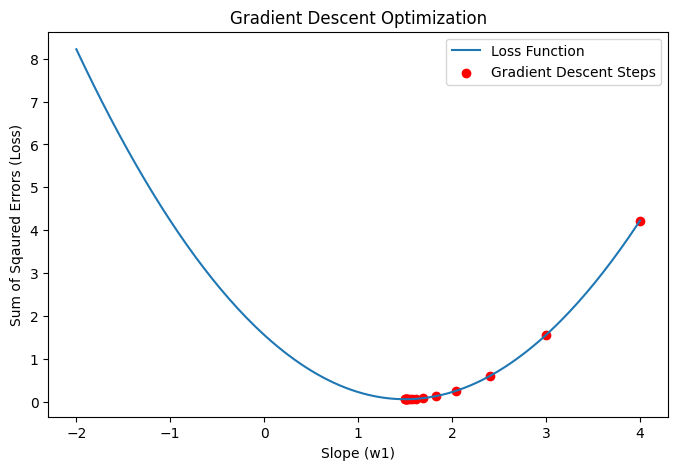

In [42]:
lr = 0.1
w1 = 4
iteration = 15

w1_values = []
loss_values = []

for i in range(iteration) :
    w1_values.append(w1)
    loss_values.append(loss(w1))
    w1 = w1 - lr * gradient(w1)

w_space = np.linspace(-2,4,200)
loss_space = [loss(w) for w in w_space]
plt.figure(figsize=(8,5))
plt.plot(w_space, loss_space, label='Loss Function')
plt.scatter(w1_values, loss_values, color='red', label='Gradient Descent Steps')
plt.xlabel('Slope (w1)')
plt.ylabel('Sum of Sqaured Errors (Loss)')
plt.title('Gradient Descent Optimization')
plt.legend()